#import relevant libraries

In [5]:
import pandas as pd
import numpy as np
from nsepy import get_history
from datetime import date

In [4]:
 pip install nsepy


The following command must be run outside of the IPython shell:

    $ pip install nsepy

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


#import stock prices from NSE

In [6]:
SBI = get_history('SBIN', start=date(2017,1,1), end=date(2019,1,25))

In [7]:
SBI.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2017-01-02,SBIN,EQ,250.20,252.5,253.65,242.6,243.55,243.60,244.80,25988990,6.362168e+14,164268,12078409,0.4648
2017-01-03,SBIN,EQ,243.60,244.0,246.40,241.1,244.90,244.90,244.54,15963085,3.903556e+14,112537,4370526,0.2738
2017-01-04,SBIN,EQ,244.90,245.8,246.40,242.2,243.20,242.90,243.96,11225978,2.738651e+14,91672,3632352,0.3236
2017-01-05,SBIN,EQ,242.90,245.0,245.90,243.7,245.50,245.35,244.94,11970913,2.932209e+14,88254,4511456,0.3769
2017-01-06,SBIN,EQ,245.35,246.0,249.00,245.5,246.05,245.90,247.10,12354302,3.052714e+14,75839,3393716,0.2747


In [8]:
ICICI = get_history('ICICIBANK', start=date(2017,1,1), end=date(2019,1,25))


In [9]:
HDFC = get_history('HDFCBANK', start=date(2017,1,1), end=date(2019,1,25))

In [10]:
INFOSYS = get_history('INFY', start=date(2017,1,1), end=date(2019,1,25))
REL = get_history('RELIANCE', start=date(2017,1,1), end=date(2019,1,25))
WIPRO = get_history('WIPRO', start=date(2017,1,1), end=date(2019,1,25))
AB = get_history('ANDHRABANK', start=date(2017,1,1), end=date(2019,1,25))

In [96]:
#concatenate and form a new data set call it as banks

In [11]:
All_stocks = pd.concat([SBI,ICICI,HDFC,INFOSYS,REL,WIPRO,AB])

In [12]:
All_stocks["Symbol"].value_counts()

SBIN          513
ICICIBANK     513
HDFCBANK      513
ANDHRABANK    513
RELIANCE      513
WIPRO         513
INFY          513
Name: Symbol, dtype: int64

In [26]:
banks.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [ ]:
#use groupby to calculate mean and standard deviation

In [14]:
All_stat2 = All_stocks.groupby(All_stocks['Symbol']).agg({'Close':['mean','std','min','max']})

In [15]:
All_stat2

Close                              
                   mean         std      min      max
Symbol                                               
ANDHRABANK    46.596881   13.134481    25.55    74.20
HDFCBANK    1824.123294  249.713215  1185.50  2202.15
ICICIBANK    305.431969   28.894984   251.10   382.25
INFY         994.248441  198.281513   619.10  1441.10
RELIANCE    1119.703314  212.239885   780.90  1650.10
SBIN         281.081774   22.345285   233.20   337.50
WIPRO        338.447076   86.021886   254.25   560.55

In [16]:
All_stat2.columns #it is a multilevel indexing

MultiIndex(levels=[['Close'], ['mean', 'std', 'min', 'max']],
           labels=[[0, 0, 0, 0], [0, 1, 2, 3]])

In [17]:
All_stat2['Close']  

,mean,std,min,max
Symbol,,,,
ANDHRABANK,46.596881,13.134481,25.55,74.20
HDFCBANK,1824.123294,249.713215,1185.50,2202.15
ICICIBANK,305.431969,28.894984,251.10,382.25
INFY,994.248441,198.281513,619.10,1441.10
RELIANCE,1119.703314,212.239885,780.90,1650.10
SBIN,281.081774,22.345285,233.20,337.50
WIPRO,338.447076,86.021886,254.25,560.55


In [18]:
All_stat3 = All_stat2['Close']

In [20]:
All_stat3

,mean,std,min,max
Symbol,,,,
ANDHRABANK,46.596881,13.134481,25.55,74.20
HDFCBANK,1824.123294,249.713215,1185.50,2202.15
ICICIBANK,305.431969,28.894984,251.10,382.25
INFY,994.248441,198.281513,619.10,1441.10
RELIANCE,1119.703314,212.239885,780.90,1650.10
SBIN,281.081774,22.345285,233.20,337.50
WIPRO,338.447076,86.021886,254.25,560.55


In [21]:
All_stat3['cv'] = All_stat3['std']/All_stat3['mean']*100   #calculating the CV

C:\Users\smerat\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [22]:
All_stat3

,mean,std,min,max,cv
Symbol,,,,,
ANDHRABANK,46.596881,13.134481,25.55,74.20,28.187467
HDFCBANK,1824.123294,249.713215,1185.50,2202.15,13.689492
ICICIBANK,305.431969,28.894984,251.10,382.25,9.460367
INFY,994.248441,198.281513,619.10,1441.10,19.942854
RELIANCE,1119.703314,212.239885,780.90,1650.10,18.955011
SBIN,281.081774,22.345285,233.20,337.50,7.949745
WIPRO,338.447076,86.021886,254.25,560.55,25.416643


In [25]:
def risk(row):
    if row["cv"]<=10:
        return "LowRisk"
    elif row["cv"]>10 and row["cv"]<=20:
        return "MediumRisk"
    else:
        return "HighRisk"

All_stat4=All_stat3.assign(Risk_Class = All_stat3.apply(risk,axis=1))

In [26]:
All_stat4

,mean,std,min,max,cv,Risk_Class
Symbol,,,,,,
ANDHRABANK,46.596881,13.134481,25.55,74.20,28.187467,HighRisk
HDFCBANK,1824.123294,249.713215,1185.50,2202.15,13.689492,MediumRisk
ICICIBANK,305.431969,28.894984,251.10,382.25,9.460367,LowRisk
INFY,994.248441,198.281513,619.10,1441.10,19.942854,MediumRisk
RELIANCE,1119.703314,212.239885,780.90,1650.10,18.955011,MediumRisk
SBIN,281.081774,22.345285,233.20,337.50,7.949745,LowRisk
WIPRO,338.447076,86.021886,254.25,560.55,25.416643,HighRisk


In [28]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np
import math
from statsmodels.tsa.stattools import acf, pacf
import statsmodels.tsa.stattools as ts
from statsmodels.tsa.arima_model import ARIMA

import warnings
import itertools
import statsmodels.api as sm

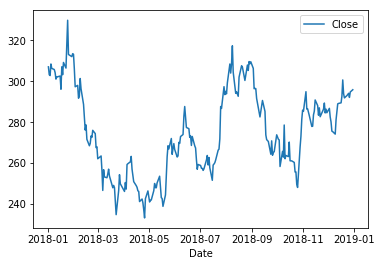

In [29]:
from nsepy import get_history
from datetime import date
Sbi_data = get_history(symbol="SBIN", start=date(2018,1,1), end=date(2018,12,31))
Sbi_data[['Close']].plot()

In [30]:
Sbi_data["firstdiff"] = Sbi_data.Close - Sbi_data.Close.shift(1)
Sbi_data["seasonaldiff"] =Sbi_data.firstdiff - Sbi_data.firstdiff.shift(5)

In [31]:
Sbi_data = Sbi_data.reset_index()

In [32]:
Sbi_data[['Date','Close','firstdiff','seasonaldiff']].head()

,Date,Close,firstdiff,seasonaldiff
0,2018-01-01,307.10,NaN,NaN
1,2018-01-02,303.25,-3.85,NaN
2,2018-01-03,302.85,-0.40,NaN
3,2018-01-04,308.50,5.65,NaN
4,2018-01-05,306.35,-2.15,NaN


In [33]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

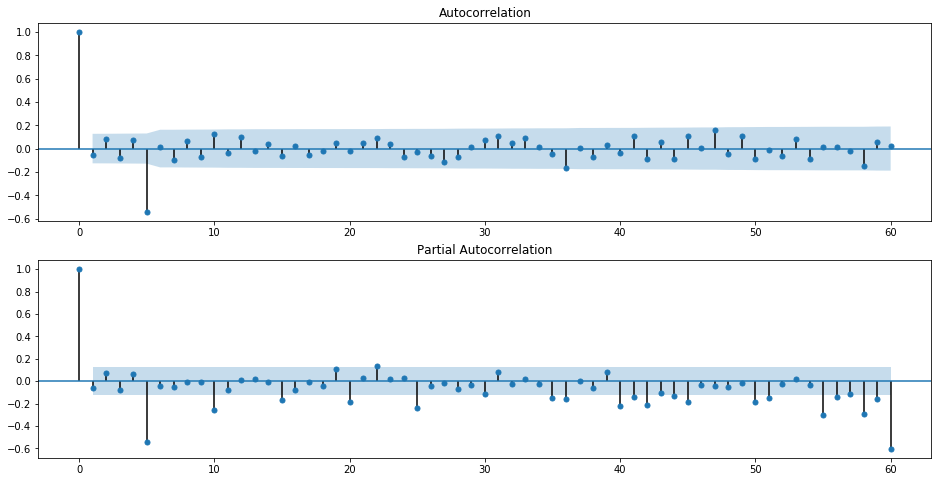

In [34]:
pyplot.figure(figsize=(16,8))
pyplot.subplot(211)
plot_acf(Sbi_data["seasonaldiff"].iloc[6:], lags = 60, ax=pyplot.gca()) 
pyplot.subplot(212)
plot_pacf(Sbi_data["seasonaldiff"].iloc[6:], lags=60, ax=pyplot.gca()) 
pyplot.show()

In [35]:
mod_1 = sm.tsa.statespace.SARIMAX(Sbi_data["Close"],
                                 order=(1, 1, 1),
                                seasonal_order=(4, 1, 1, 5),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results_1 = mod_1.fit()

results_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                
=========================================================================================
Dep. Variable:                             Close   No. Observations:                  246
Model:             SARIMAX(1, 1, 1)x(4, 1, 1, 5)   Log Likelihood                -689.734
Date:                           Mon, 28 Jan 2019   AIC                           1395.468
Time:                                   08:48:11   BIC                           1422.581
Sample:                                        0   HQIC                          1406.418
                                           - 246                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5607      1.021     -0.549      0.583      -2.562       1.441
ma.L1          0.5298      1.052      0.504      0.614      -1.532       2.591
ar.S.L5       -0.0059      0.073     -0.081      0.935      -0.149       0.137
ar.S.L10       0.1111      0.072      1.538      0.124      -0.030       0.253
ar.S.L15      -0.0493      0.063     -0.779      0.436      -0.173       0.075
ar.S.L20      -0.0940      0.075     -1.259      0.208      -0.240       0.052
ma.S.L5       -1.0000    354.821     -0.003      0.998    -696.437     694.437
sigma2        29.3088   1.04e+04      0.003      0.998   -2.04e+04    2.04e+04
===================================================================================
Ljung-Box (Q):                       22.00   Jarque-Bera (JB):                 6.48
Prob(Q):                              0.99   Prob(JB):                         0.04
Heteroskedasticity (H):               1.16   Skew:                             0.21
Prob(H) (two-sided):                  0.53   Kurtosis:                         3.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
predictions=results_1.predict(247, 277, typ='levels')
predictions

247    295.951515
248    296.470659
249    296.177949
250    295.945059
251    296.318358
252    295.218206
253    293.811741
254    294.312054
255    294.518554
256    294.588007
257    293.833072
258    292.837551
259    293.524936
260    293.641607
261    293.721100
262    293.099899
263    292.698853
264    292.744371
265    292.670667
266    292.803254
267    292.377648
268    291.876912
269    292.184439
270    292.205478
271    292.324584
272    291.998055
273    291.724621
274    291.875572
275    291.838045
276    291.991184
277    291.646761
dtype: float64

In [37]:
Sbi_data.shape

(246, 17)